# Лабораторная работа №1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from matplotlib.lines import Line2D
%matplotlib inline

## 1.	Загрузите данные в ноутбук

In [2]:
data = pd.read_excel("./var3.xlsx", header=2, skipfooter=1)
data.head()

,№,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,Минимальный балл
0,1,152,11,М,333,----001---00---000--1-+0---,0(3)0(3)0(3)0(3)0(3),NaN,3,10,36
1,2,140,12,Ж,332,----100---01-+-000--0--1---,0(3)0(3)0(3)0(3)0(3),NaN,4,14,36
2,3,137,11,М,328,--+-010---00---101--0--1---,0(3)0(3)0(3)0(3)0(3),NaN,5,17,36
3,4,148,11,М,333,-+--000--+01---100--0--1---,0(3)0(3)0(3)0(3)0(3),NaN,5,17,36
4,5,153,11,Ж,333,-+--100---00---100-+0--1---,0(3)0(3)0(3)0(3)0(3),NaN,5,17,36


## 2.	Сделайте описательную статистику по среднему баллу

In [3]:
data['Балл'].describe()

count    1179.000000
mean       52.006785
std        14.906441
min        10.000000
25%        41.000000
50%        49.000000
75%        60.000000
max       100.000000
Name: Балл, dtype: float64

## 3.	Найдите процент учащихся, выполнивших работу ниже среднего

In [4]:
data['Балл'].mean().sum()

52.00678541136556

In [5]:
(data['Балл'] < data['Балл'].mean()).sum() / len(data) * 100

56.318914334181514

## 4.	Найти процент учащихся не сдавших экзамен

In [6]:
(data['Балл'] < data['Минимальный балл']).sum() / len(data) * 100

7.718405428329092

## 5.	Постройте круговую диаграмму, показывающую распределение сдавших и не сдавших экзамен

[Text(0.5, 1.0, 'Распределение сдавших/не сдавших')]

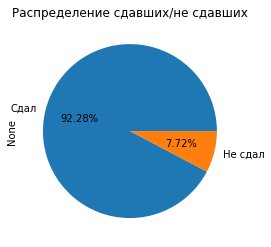

In [7]:
s = (data['Балл'] >= data['Минимальный балл']).value_counts()
s.index = s.index.map({False: 'Не сдал', True: 'Сдал'})
s.plot.pie(autopct='%1.2f%%').set(title="Распределение сдавших/не сдавших")

## 6.	Постройте гистограмму по распределению баллов за экзамен. Соответствует ли оно нормальному распределению?

<AxesSubplot:xlabel='Балл', ylabel='Count'>

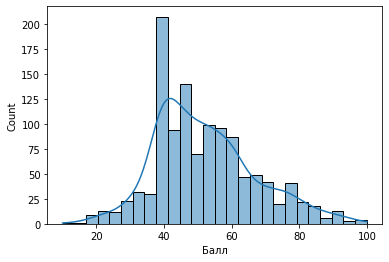

In [8]:
sns.histplot(x=data['Балл'], kde=True, ax=plt.subplots()[1])

Распределение похоже на нормальное

## 7.	Постройте оценку ядерной плотности распределению баллов за экзамен

<AxesSubplot:xlabel='Балл', ylabel='Density'>

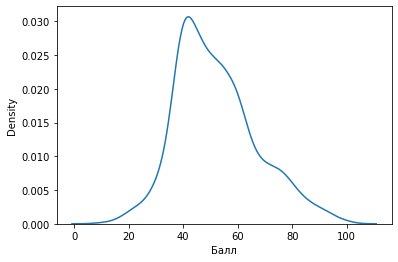

In [9]:
sns.kdeplot(x=data['Балл'], ax=plt.subplots()[1])

## 8.	Найдите процентное соотношение учащихся, сдавших экзамен на «отлично», «хорошо», «удовлетворительно», «неудовлетворительно». Сделайте графическое представление данного распределения

In [10]:
def finder(s, first, second):
    mask = (s >= first) & (s <= second)
    result = mask.sum() / len(s) * 100
    return result

In [11]:
s = pd.Series({})
score = data['Балл']
s["неудовлетворительно"] = finder(score, 0, 35)
s["удовлетворительно"] = finder(score, 36, 52)
s["хорошо"] = finder(score, 53, 67)
s["отлично"] = finder(score, 68, 100)

/var/folders/wp/b9w68jpd68xfy1wmgy4_08xh0000gn/T/ipykernel_33845/3711486819.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series({})


[Text(0.5, 1.0, 'Процентное соотношение учащихся по различным оценкам')]

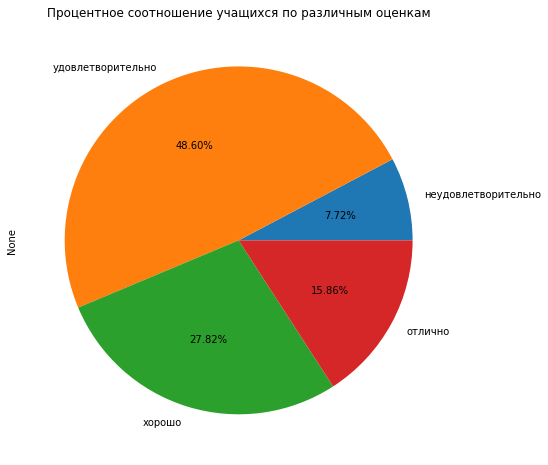

In [12]:
s.plot.pie(figsize=(8, 8), autopct='%1.2f%%').set(title='Процентное соотношение учащихся по различным оценкам')

## 9.	Постройте «ящиковые диаграммы», сравнивающие баллы учащихся, сдавших экзамен на «отлично», «хорошо», «удовлетворительно», «неудовлетворительно»

In [37]:
buffer = pd.DataFrame({
"неудовлетворительно": score[((score >= 0) & (score <= 35))],
"удовлетворительно": score[((score >= 36) & (score <= 52))],
"хорошо": score[((score >= 53) & (score <= 67))],
"отлично": score[((score >= 68) & (score <= 100))],
})

<AxesSubplot:>

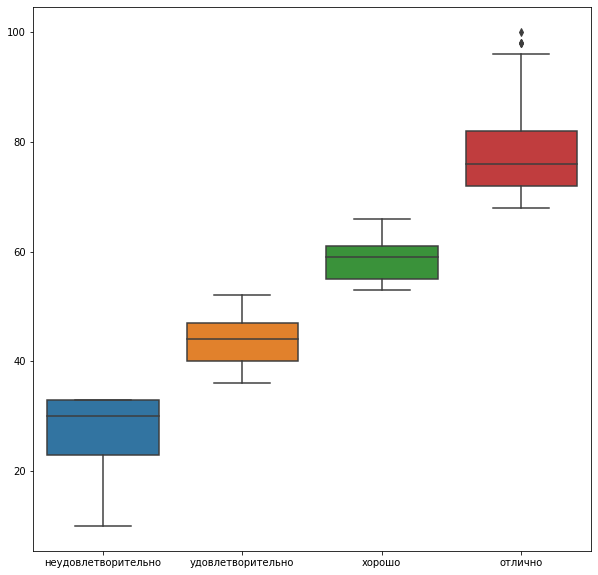

In [39]:
sns.boxplot(data=buffer, ax=plt.subplots(figsize=(10, 10))[1])

## 10.	Какое процентное соотношение юношей и девушек писало данный экзамен? Представьте графически

<AxesSubplot:ylabel='Пол'>

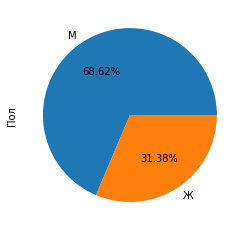

In [40]:
data['Пол'].value_counts().plot.pie(autopct='%1.2f%%')

## 11.	Постройте диаграмму рассеивания, позволяющую увидеть средние баллы девушек и юношей

Пол
Ж    AxesSubplot(0.125,0.125;0.775x0.755)
М    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Балл, dtype: object

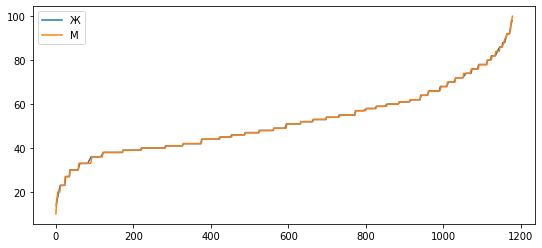

In [41]:
data.groupby('Пол')['Балл'].plot(figsize=(9, 4), legend=True)

## 12.	Сколько школ принимало участие в экзамене?

In [42]:
print(data["№ школы"].nunique(), "школ")

19 школ


## 13.	Постройте диаграмму, позволяющую сравнить средние баллы за экзамен по школам. Если какие-нибудь выбросы?

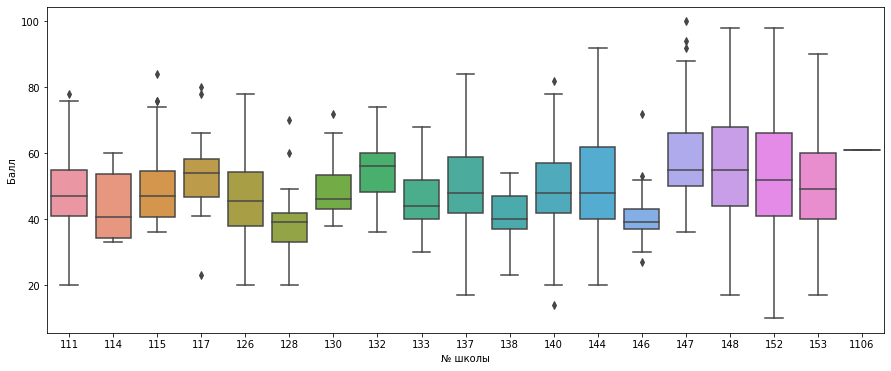

In [46]:
_ = sns.boxplot(data=data, x='№ школы', y='Балл', ax=plt.subplots(figsize=(15, 6))[1])

Да, выбросы имеются, например в 128 школе сильно выделяется ученик, набравший 70 баллов. В других школах также имеются выбросы

# __Повышенной сложности:__

## 1.	Сколько всего заданий с кратким ответом? С развернутым ответом?

In [51]:
first_row = data.head(1)
short_answer = first_row["Задания с кратким ответом"].str.len().item()
long_answer = first_row["Задания с развёрнутым ответом"].str.count(re.compile(r'\d+\(\d+\)')).item()


print(f'Заданий с кратким ответом: {short_answer}')
print(f'Заданий с развернутым ответом: {long_answer}')

Заданий с кратким ответом: 27
Заданий с развернутым ответом: 5


## 2.	Пусть задания с кратким ответом будут задания типа В. Соответственно всего по экзамену вопросов класса В: В1 … Вк  Посчитайте процент выполненных и невыполненных заданий по каждому вопросу класса В. Постройте гистограмму, позволяю щую увидеть данное распределение. Какие есть выпады по данному распределению?

## 3.	Аналогично и с типом С (ответы с развернутым ответом)

## 4.	Сделайте анализ по двум школам:
* А) по всем выполненным заданиям типа В
* Б) по заданиям типа С больше 50%
* В) по среднему балу юношей и девушек


### Б) по заданиям типа С больше 50%

### в) по среднему балу юношей и девушек